## Data Cleaning and Preparation:

In [5]:
# Load the dataset

import pandas as pd
df = pd.read_csv('Cardiotocographic.csv')
print(df.shape)
print(df.info())

(2126, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB
None


In [6]:
df.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [7]:
#Fill missing values with mean

df = df.fillna(df.mean(numeric_only=True))
df.isnull().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

In [9]:
# Identify and correct inconsistencies in data types

print(df.dtypes)

df = df.apply(pd.to_numeric)
print(df)

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object
              LB        AC        FM        UC        DL   DS   DP  ASTV  \
0     120.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0  73.0   
1     132.000000  0.006380  0.000000  0.006380  0.003190  0.0  0.0  17.0   
2     133.000000  0.003322  0.000000  0.008306  0.003322  0.0  0.0  16.0   
3     134.000000  0.002561  0.000000  0.007742  0.002561  0.0  0.0  16.0   
4     131.948232  0.006515  0.000000  0.008143  0.000000  0.0  0.0  16.0   
...          ...       ...       ...       ...       ...  ...  ...   ...   
2121  140.000000  0.000000  0.961268  0.007426  0.000000  0.0  0.0  79.0   
2122  140.000000  0.000775  0.000000  0.006979  0.000000  0.0  0.0  78.0   
2123  140.000000  0.00

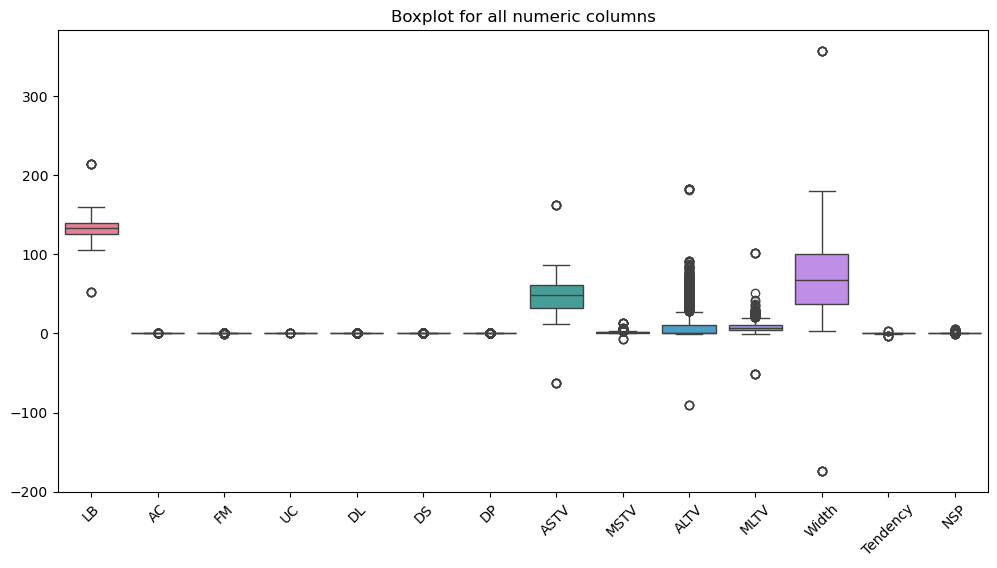

In [10]:
## Detect and treat outliers

import seaborn as sns
import matplotlib.pyplot as plt 

plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title('Boxplot for all numeric columns')
plt.xticks(rotation=45)
plt.show()

In [12]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

summary_iqr = pd.DataFrame({
    'Mean': df.mean(),
    'Median': df.median(),
    'Std Dev': df.std(),
    'IQR': IQR
})

summary_iqr = summary_iqr.round(3)
summary_iqr

,Mean,Median,Std Dev,IQR
LB,133.344,133.000,11.214,14.000
AC,0.003,0.002,0.004,0.006
FM,0.010,0.000,0.068,0.003
UC,0.004,0.004,0.003,0.005
DL,0.002,0.000,0.003,0.003
DS,0.000,0.000,0.000,0.000
DP,0.000,0.000,0.001,0.000
ASTV,46.996,49.000,18.814,29.000
MSTV,1.364,1.200,1.174,1.000
ALTV,10.286,0.000,21.205,11.000


## Statistical Summary:

* I found the mean, median, standard deviation, and IQR for all columns.
Most values like AC, FM, and UC are almost the same with small changes.
Some columns like LB, ASTV, ALTV, and Width have big differences, which means their values change a lot and may have some unusual readings.

* Some columns like LB, ASTV, and Width have high variation, showing that the readings are not steady for all cases.
Most other columns stay close to their average values, meaning the data is mostly consistent with only a few unusual points.

## Data Visualization:

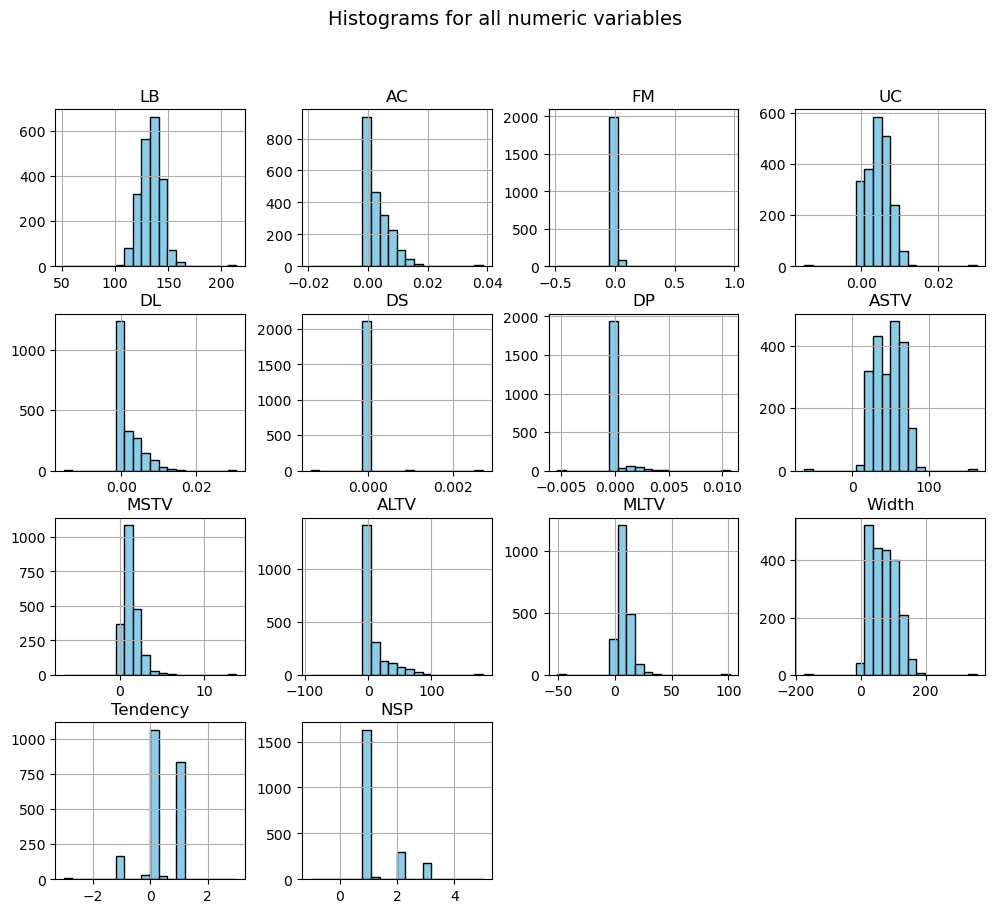

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

df.hist(figsize=(12,10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Histograms for all numeric variables", fontsize=14)
plt.show()

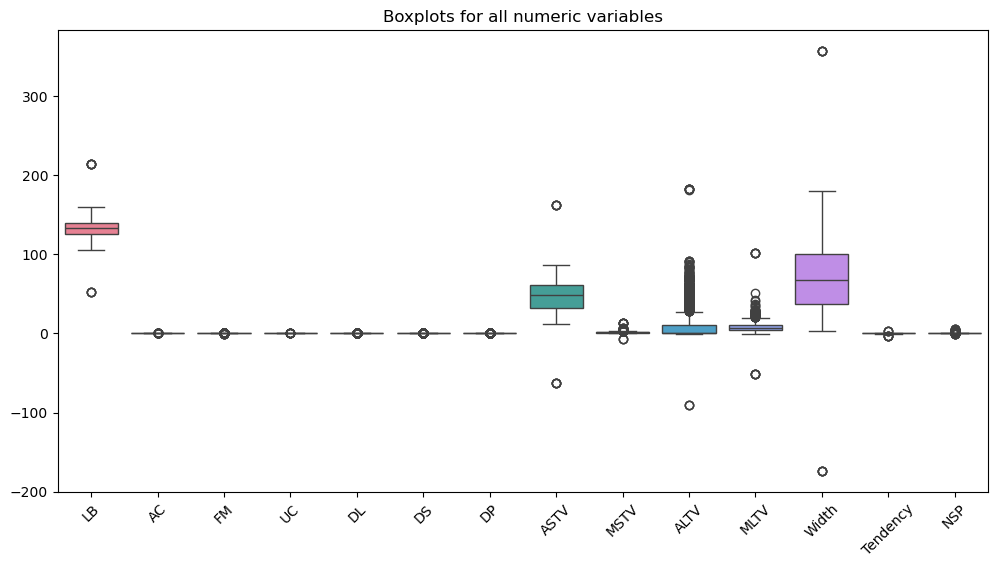

In [14]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.title("Boxplots for all numeric variables")
plt.xticks(rotation=45)
plt.show()

Most columns have steady values, while a few like LB, ASTV, and Width show big changes.

In [16]:
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [18]:
df['NSP'].unique()

array([ 2.        ,  1.        ,  3.        , -1.025988  ,  1.01084882,
        0.99671416,  1.30450718,  3.00453507,  0.99775653,  5.        ,
        1.01334917,  0.99792058,  1.00336665,  1.01749703,  1.01503495,
        0.99796582,  1.00733543,  0.98342028,  2.00660501,  2.01817732,
        2.00412825, -1.        ,  0.99418412,  1.01828761,  1.99573874,
        1.0107802 ,  1.99416358,  1.00377816,  0.97544038,  0.99223419,
        0.99768784,  1.96492092,  0.98122639,  0.99120013,  0.98483388,
        2.97130924,  0.99284679,  1.00350971,  0.99597399,  3.0191516 ,
        3.01518503,  1.99747195,  0.97973798,  2.01631524,  2.03516005,
        1.99860173,  0.99167495,  0.98839285,  1.00817061,  0.98749813,
        0.99379572,  0.98900567,  0.99634758,  1.0003288 ,  1.01821721,
        1.02128352,  0.99106613,  1.01663825,  1.00206333,  0.98145959,
        1.00068221,  1.00026942,  1.00615323,  0.9959162 ,  1.0198268 ,
        0.97230458,  0.9670755 ,  1.00542202,  0.98479205,  1.00

In [19]:
df['NSP'] = df['NSP'].round().astype(int)
df['NSP']

0       2
1       1
2       1
3       1
4       1
       ..
2121    2
2122    2
2123    2
2124    2
2125    1
Name: NSP, Length: 2126, dtype: int64

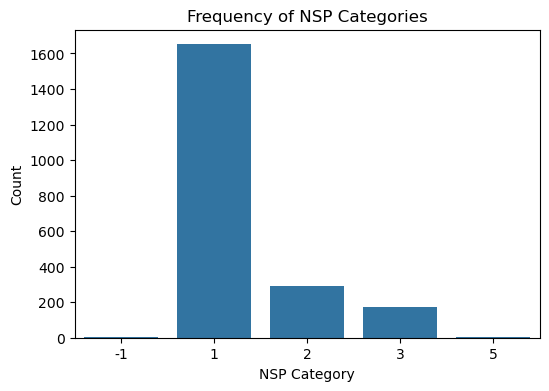

In [21]:
plt.figure(figsize=(6,4))
sns.countplot(x='NSP', data=df)
plt.title("Frequency of NSP Categories")
plt.xlabel("NSP Category")
plt.ylabel("Count")
plt.show()

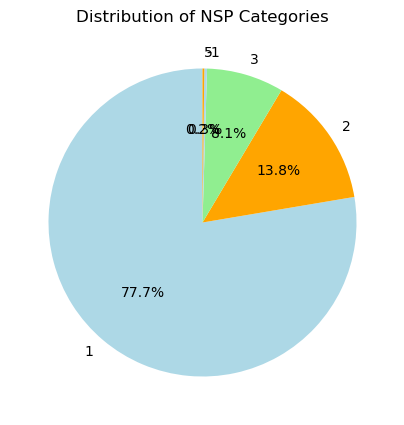

In [22]:
counts = df['NSP'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue','orange','lightgreen'])
plt.title("Distribution of NSP Categories")
plt.show()

From the bar and pie charts, most records belong to category 1, which makes up about 78% of the data.
Category 2 has around 14%, and category 3 has about 8%.
Very few cases belong to other categories.
This means that most fetal states in the dataset are normal, while only a few are suspect or abnormal.

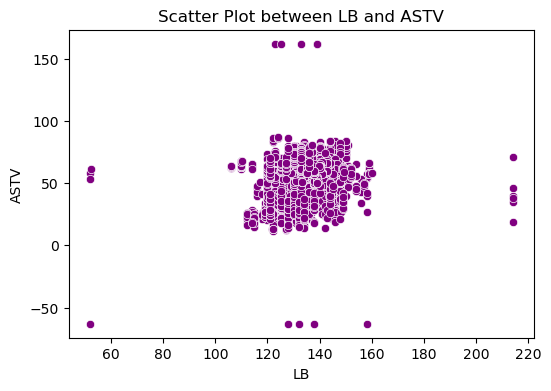

In [23]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='LB', y='ASTV', data=df, color='purple')
plt.title("Scatter Plot between LB and ASTV")
plt.xlabel("LB")
plt.ylabel("ASTV")
plt.show()

From the bar chart and pie chart, most of the records belong to NSP = 1, which means normal cases.
A smaller number of records have NSP = 2 and NSP = 3, showing suspect and abnormal cases.

<Axes: xlabel='Width', ylabel='ALTV'>

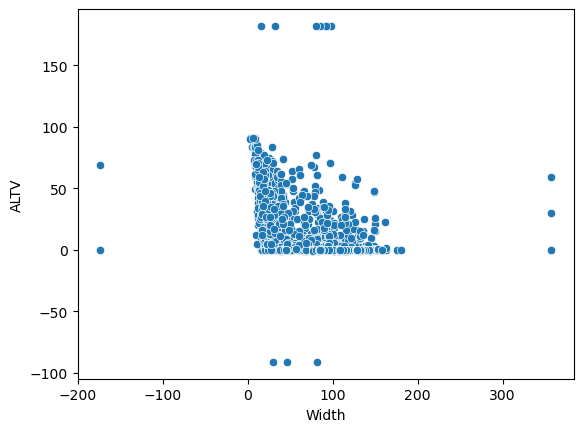

In [24]:
sns.scatterplot(x='Width', y='ALTV', data=df)

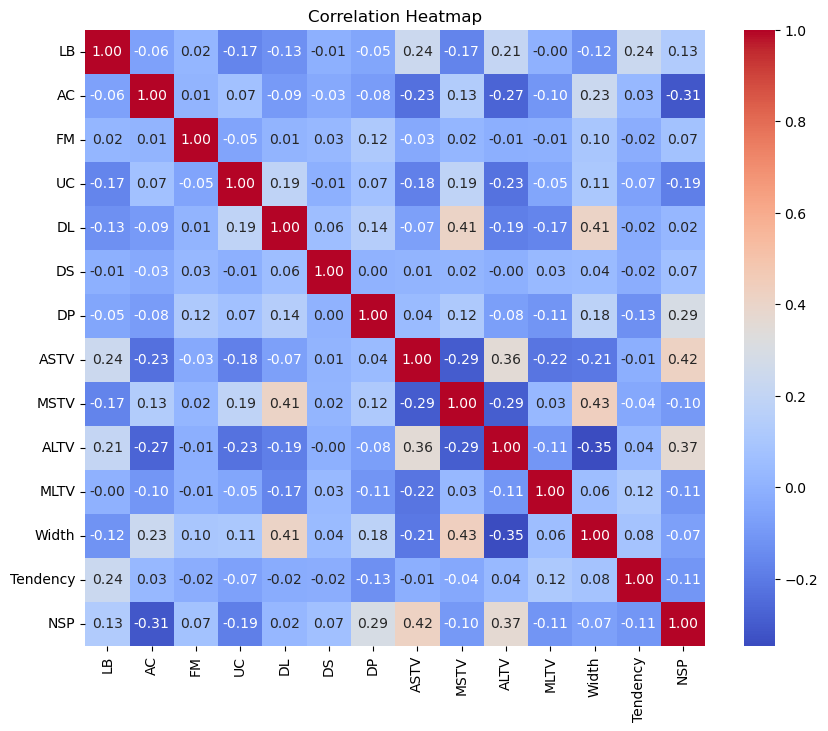

In [25]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

The heatmap shows that most variables have weak or moderate relationships.
ASTV, ALTV, and Width have some positive links with NSP, meaning they may help in predicting the baby’s health condition.

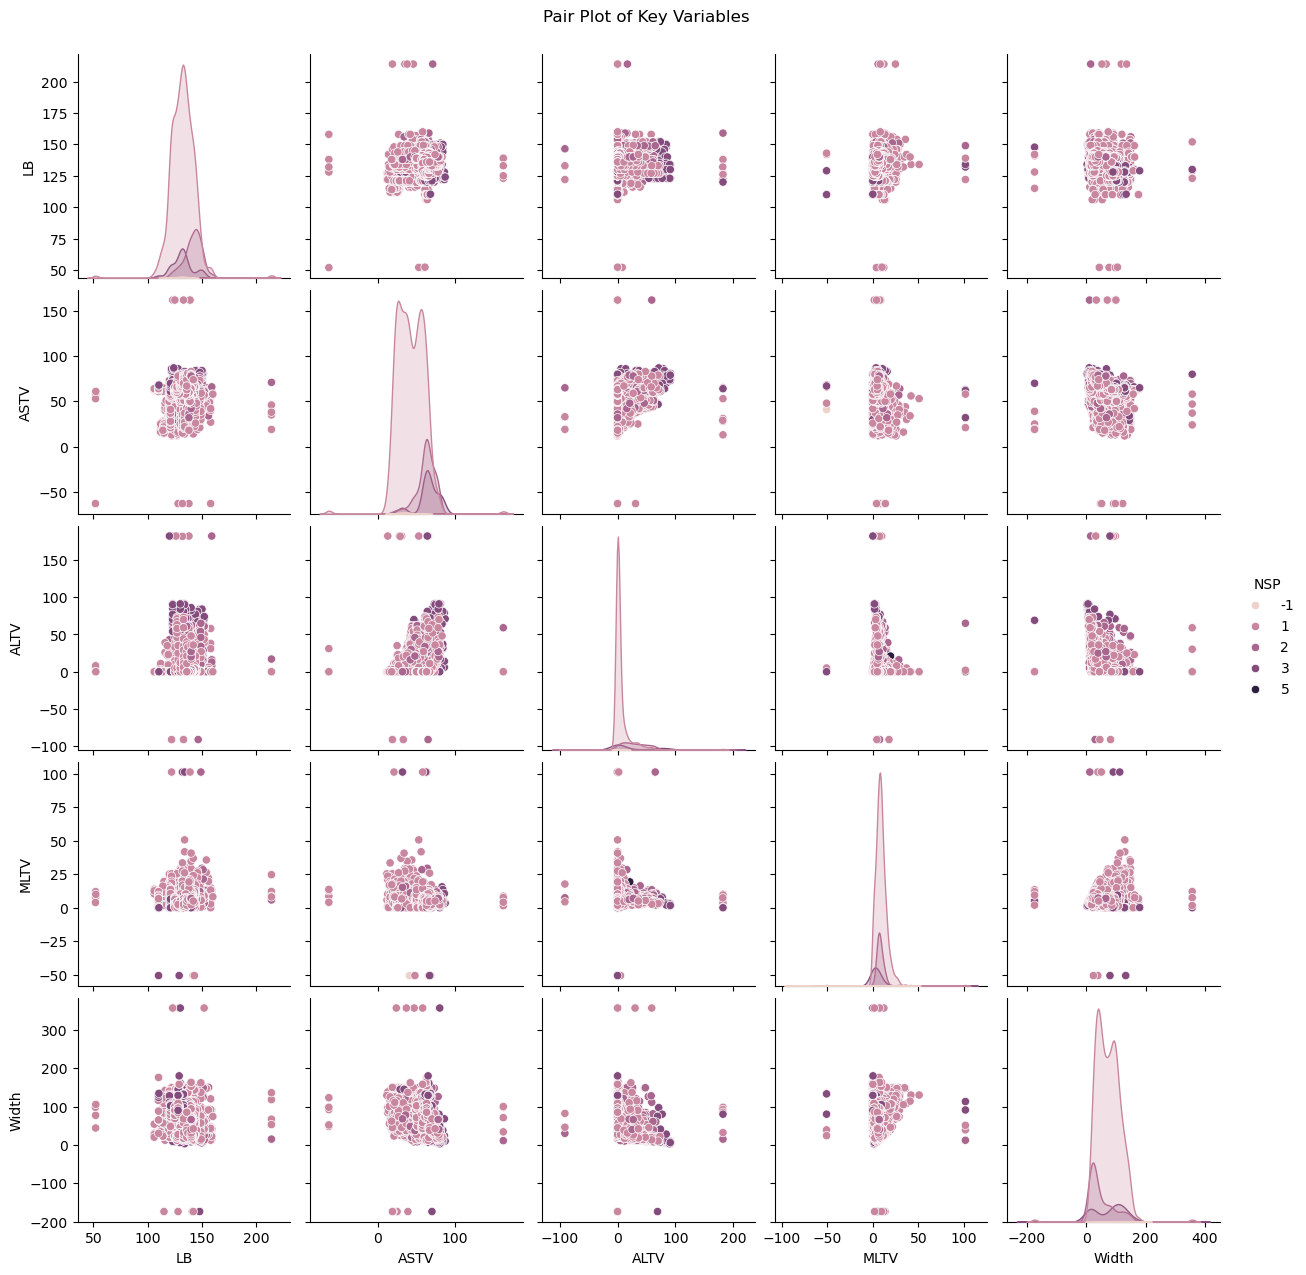

In [26]:
sns.pairplot(df[['LB', 'ASTV', 'ALTV', 'MLTV', 'Width', 'NSP']], diag_kind='kde', hue='NSP')
plt.suptitle("Pair Plot of Key Variables", y=1.02)
plt.show()

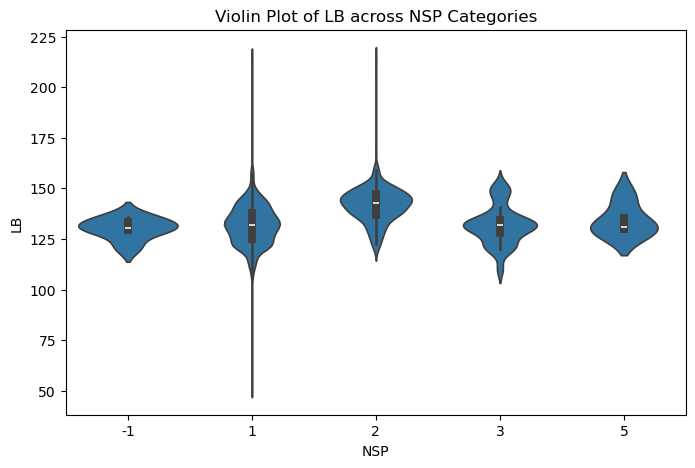

In [28]:
plt.figure(figsize=(8,5))
sns.violinplot(x='NSP', y='LB', data=df)
plt.title("Violin Plot of LB across NSP Categories")
plt.show()

This graph shows how the LB (heart rate) changes for each NSP group.
Most values are between 120 and 150.
The group with NSP = 2 has more spread, which means the heart rate changes more in that group than in others.

In [31]:
corr = df.corr()

corr_pairs = corr.unstack()
corr_pairs = corr_pairs[corr_pairs != 1]

corr_pairs.sort_values(ascending=False).head(10)

Width  MSTV     0.433064
MSTV   Width    0.433064
ASTV   NSP      0.420983
NSP    ASTV     0.420983
MSTV   DL       0.410102
DL     MSTV     0.410102
Width  DL       0.408664
DL     Width    0.408664
NSP    ALTV     0.366485
ALTV   NSP      0.366485
dtype: float64

## Pattern Recognition and Insights
* Width and MSTV change together the most.
* Also, ASTV and NSP have a link, meaning when ASTV goes up, NSP also changes.
* This shows that some features in the data move in the same way and may be connected.

From the analysis, most data values are normal with a few outliers.
Some features like LB, ASTV, and Width show big changes, while others stay steady.
We also found that Width, MSTV, and ASTV are related to NSP, showing how heart rate patterns connect to the baby’s health condition.

These findings can help doctors or researchers understand which readings matter most for checking the baby’s well-being and can guide further study or better medical decisions.